In [14]:
%matplotlib inline
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [15]:
def learn_perceptron(neg_examples_nobias, pos_examples_nobias, w_init, w_gen_feas):
    """Learns the weights of a perceptron and displays the results.
    Learns the weights of a perceptron for a 2-dimensional dataset and plots
    the perceptron at each iteration where an iteration is defined as one
    full pass through the data. If a generously feasible weight vector
    is provided then the visualization will also show the distance
    of the learned weight vectors to the generously feasible weight vector.
    Required Inputs:
        neg_examples_nobias - The num_neg_examples x 2 matrix for the
            examples with target 0.
        num_neg_examples is the number of examples for the negative class.
        pos_examples_nobias - The num_pos_examples x 2 matrix for the
            examples with target 1.
        num_pos_examples is the number of examples for the positive class.
        w_init - A 3-dimensional initial weight vector. The last element
            is the bias.
        w_gen_feas - A generously feasible weight vector.
    Returns:
        w - The learned weight vector.
    """

    # Bookkeeping
    num_neg_examples = len(neg_examples_nobias)
    num_pos_examples = len(pos_examples_nobias)
    num_err_history = []
    w_dist_history = []

    # Here we add a column of ones to the examples in order to allow us to learn
    # bias parameters.
    neg_examples = np.append(neg_examples_nobias,
                             np.ones((num_neg_examples,1), dtype=float),
                             axis=1)
    pos_examples = np.append(pos_examples_nobias,
                             np.ones((num_pos_examples,1), dtype=float),
                             axis=1)

    # Find the data points that the perceptron has incorrectly classified
    # and record the number of errors it makes.
    iter = 0
    w = w_init
    [mistakes0, mistakes1] = eval_perceptron(neg_examples,pos_examples,w)
    num_errs = len(mistakes0) + len(mistakes1)
    num_err_history.append(num_errs)

    print('Number of errors in iteration', iter, ':', num_errs)
    print('Weights:', w.tolist())

    plot_perceptron(neg_examples, pos_examples, mistakes0, mistakes1,
                    num_err_history, w, w_dist_history)
    # input('Press Enter to continue...')

    # If a generously feasible weight vector exists, record the distance
    # to it from the initial weight vector.

    if len(w_gen_feas) > 0:
        w_dist_history.append(np.linalg.norm(w - w_gen_feas))

    # Iterate until the perceptron has correctly classified all points.
    while num_errs > 0:
        iter = iter + 1

        # Update the weights of the perceptron.
        w = update_weights(neg_examples,pos_examples,w)

        # If a generously feasible weight vector exists, record the distance
        # to it from the current weight vector.
        if len(w_gen_feas) > 0:
            w_dist_history.append(np.linalg.norm(w - w_gen_feas))

        # Find the data points that the perceptron has incorrectly classified.
        # and record the number of errors it makes.
        [mistakes0, mistakes1] = eval_perceptron(neg_examples,pos_examples,w)
        num_errs = len(mistakes0) + len(mistakes1)
        num_err_history.append(num_errs)

        print('Number of errors in iteration', iter, ':', num_errs)
        print('Weights:', w.tolist())

        plot_perceptron(neg_examples, pos_examples, mistakes0, mistakes1,
                        num_err_history, w, w_dist_history)
        # input('<Press enter to continue...',)
    return w

In [47]:
def update_weights(neg_examples, pos_examples, w_current):
    """Updates the weights of the perceptron for incorrectly classified points
       using the perceptron update algorithm. This function makes one sweep
       over the dataset.
    Inputs:
        neg_examples - The num_neg_examples x 3 matrix for the examples
            with target 0.
            num_neg_examples is the number of examples for the negative class.
        pos_examples - The num_pos_examples x 3 matrix for the examples
            with target 1.
            num_pos_examples is the number of examples for the positive class.
        w_current - A 3-dimensional weight vector, the last element is
            the bias.
    Returns:
        w - The weight vector after one pass through the dataset using
            the perceptron learning rule.
    """
    w = w_current
    print(w)
    for i in range(neg_examples.shape[0]):
        this_case = neg_examples[i]
        print(this_case)
        activation = this_case.dot(w)
        if (activation >= 0):
            w -= this_case.reshape(3,1)
    for i in range(pos_examples.shape[0]):
        this_case = pos_examples[i]
        activation = this_case.dot(w)
        if (activation < 0):
            w += this_case.reshape(3,1)
    return w

In [17]:
def eval_perceptron(neg_examples, pos_examples, w):
    """Evaluates the perceptron using a given weight vector.
    Here, evaluation refers to finding the data points that the
    perceptron incorrectly classifies.
    Inputs:
        neg_examples - The num_neg_examples x 3 matrix for the examples
            with target 0.
            num_neg_examples is the number of examples for the negative class.
        pos_examples - The num_pos_examples x 3 matrix for the examples
            with target 1.
            num_pos_examples is the number of examples for the positive class.
        w - A 3-dimensional weight vector, the last element is the bias.
    Returns:
        mistakes0 - A vector containing the indices of the negative examples
            that have been incorrectly classified as positive.
        mistakes1 - A vector containing the indices of the positive examples
            that have been incorrectly classified as negative.
    """

    num_neg_examples = neg_examples.shape[0]
    num_pos_examples = pos_examples.shape[0]
    mistakes0 = []
    mistakes1 = []

    for i in range(num_neg_examples):
        x = neg_examples[i]
        activation = x.dot(w)
        if activation >= 0:
            mistakes0.append(i)

    for i in range(num_pos_examples):
        x = pos_examples[i]
        activation = x.dot(w)
        if activation < 0:
            mistakes1.append(i)

    return [mistakes0, mistakes1]

In [18]:
def plot_perceptron(neg_examples, pos_examples, mistakes0, mistakes1,
                    num_err_history, w, w_dist_history):
    """Plots information about a perceptron classifier on a 2-dimensional dataset.
    The top-left plot shows the dataset and the classification boundary given by
    the weights of the perceptron. The negative examples are shown as circles
    while the positive examples are shown as squares. If an example is colored
    green then it means that the example has been correctly classified by the
    provided weights. If it is colored red then it has been incorrectly classified.
    The top-right plot shows the number of mistakes the perceptron algorithm has
    made in each iteration so far.
    The bottom-left plot shows the distance to some generously feasible weight
    vector if one has been provided (note, there can be an infinite number of these).
    Points that the classifier has made a mistake on are shown in red,
    while points that are correctly classified are shown in green.
    The goal is for all of the points to be green (if it is possible to do so).
    Inputs:
        neg_examples - The num_neg_examples x 3 matrix for the examples
            with target 0.
            num_neg_examples is the number of examples for the negative class.
        pos_examples- The num_pos_examples x 3 matrix for the examples
            with target 1.
            num_pos_examples is the number of examples for the positive class.
        mistakes0 - A vector containing the indices of the datapoints from
            class 0 incorrectly classified by the perceptron. This is a
            subset of neg_examples.
        mistakes1 - A vector containing the indices of the datapoints from
            class 1 incorrectly classified by the perceptron. This is a
            subset of pos_examples.
        num_err_history - A vector containing the number of mistakes for each
            iteration of learning so far.
        w - A 3-dimensional vector corresponding to the current weights of the
            perceptron. The last element is the bias.
        w_dist_history - A vector containing the L2-distance to a generously
            feasible weight vector for each iteration of learning so far.
            Empty if one has not been provided.
    """

    plt.figure(1)
    plt.clf()

    neg_examples_right = []
    neg_examples_mistakes = []
    pos_examples_right = []
    pos_examples_mistakes = []

    for i,k in enumerate(neg_examples):
        if i in mistakes0:
            neg_examples_mistakes.append([k[0],k[1]])
        else:
            neg_examples_right.append([k[0],k[1]])

    for i,k in enumerate(pos_examples):
        if i in mistakes1:
            pos_examples_mistakes.append([k[0],k[1]])
        else:
            pos_examples_right.append([k[0],k[1]])

    plt.subplot(221)
    if len(neg_examples_right)>0:
        plt.plot(np.array(neg_examples_right)[:,0],
                 np.array(neg_examples_right)[:,1], 'go')
    if len(pos_examples_right)>0:
        plt.plot(np.array(pos_examples_right)[:,0],
                 np.array(pos_examples_right)[:,1], 'gs')
    if len(neg_examples_mistakes)>0:
        plt.plot(np.array(neg_examples_mistakes)[:,0],
                 np.array(neg_examples_mistakes)[:,1], 'ro')
    if len(pos_examples_mistakes)>0:
        plt.plot(np.array(pos_examples_mistakes)[:,0],
                 np.array(pos_examples_mistakes)[:,1], 'rs')

    plt.title('Classifier')

    # In order to plot the decision line, we just need to get two points.
    plt.plot([-5,5],[(-w[-1]+5*w[0])/w[1],(-w[-1]-5*w[0])/w[1]],'k')
    plt.xlim([-1,1])
    plt.ylim([-1,1])

    plt.subplot(222)
    # print(num_err_history)
    plt.plot(range(len(num_err_history)),num_err_history,'ok')
    plt.xlim([-1,max(15,len(num_err_history))])
    plt.ylim([0,len(neg_examples)+len(pos_examples)+1])
    plt.title('Number of errors')
    plt.xlabel('Iteration')
    plt.ylabel('Number of errors')
    #
    plt.subplot(2,2,3)
    if len(w_dist_history)>0:
        plt.plot(range(len(w_dist_history)),w_dist_history,'ok')
        plt.xlim([-1,max(15,len(num_err_history))])
        plt.ylim([0,15])
        plt.title('Distance')
        plt.xlabel('Iteration')
        plt.ylabel('Distance')

    plt.show()

In [49]:
def get_data(filename):
    data1 = sio.loadmat(filename)
    neg_examples_nobias = data1["neg_examples_nobias"]
    pos_examples_nobias = data1["pos_examples_nobias"]
    # If weight vectors have not been provided, initialize them appropriately.
    # Else just read them.
    if ('w_init' in data1) and len(data1['w_init'])>0:
        w_init = data1['w_init']
    else:
        w_init = np.random.randn(3).reshape(3,1)

    if 'w_gen_feas' in data1:
        w_gen_feas = data1['w_gen_feas']
    else:
        w_gen_feas = []
    return neg_examples_nobias, pos_examples_nobias, w_init, w_gen_feas

In [50]:
neg_examples_nobias, pos_examples_nobias, w_init, w_gen_feas = get_data("Datasets/dataset3.mat")

In [51]:
## Launch learning
def learn_perceptron_from_data(filename):
    neg_examples_nobias, pos_examples_nobias, w_init, w_gen_feas = get_data(filename)
    learn_perceptron(neg_examples_nobias, pos_examples_nobias, w_init, w_gen_feas)

Number of errors in iteration 0 : 7
Weights: [[0.9036803371988847], [-0.4908754917186831], [0.9485529482883966]]


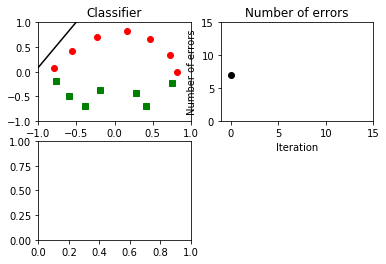

[[ 0.90368034]
 [-0.49087549]
 [ 0.94855295]]
[-0.79142857  0.07973422  1.        ]
[-0.55714286  0.41196013  1.        ]
[-0.22571429  0.69767442  1.        ]
[ 0.16285714  0.83056478  1.        ]
[ 0.46        0.65780731  1.        ]
[ 0.73428571  0.33887043  1.        ]
[ 0.82571429 -0.01328904  1.        ]
Number of errors in iteration 1 : 2
Weights: [[0.47225176577031336], [-1.4211080498582185], [-0.051447051711603464]]


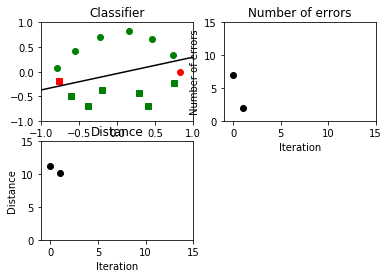

[[ 0.47225177]
 [-1.42110805]
 [-0.05144705]]
[-0.79142857  0.07973422  1.        ]
[-0.55714286  0.41196013  1.        ]
[-0.22571429  0.69767442  1.        ]
[ 0.16285714  0.83056478  1.        ]
[ 0.46        0.65780731  1.        ]
[ 0.73428571  0.33887043  1.        ]
[ 0.82571429 -0.01328904  1.        ]
Number of errors in iteration 2 : 4
Weights: [[-0.36489109137254383], [-1.8330681827485837], [0.9485529482883965]]


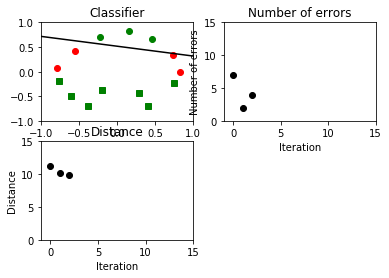

[[-0.36489109]
 [-1.83306818]
 [ 0.94855295]]
[-0.79142857  0.07973422  1.        ]
[-0.55714286  0.41196013  1.        ]
[-0.22571429  0.69767442  1.        ]
[ 0.16285714  0.83056478  1.        ]
[ 0.46        0.65780731  1.        ]
[ 0.73428571  0.33887043  1.        ]
[ 0.82571429 -0.01328904  1.        ]
Number of errors in iteration 3 : 3
Weights: [[-0.41060537708682965], [-2.3247625349080527], [0.9485529482883965]]


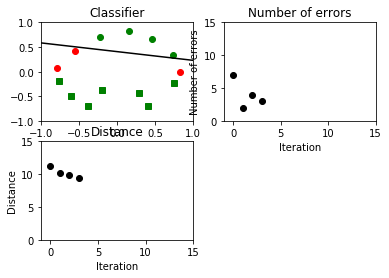

[[-0.41060538]
 [-2.32476253]
 [ 0.94855295]]
[-0.79142857  0.07973422  1.        ]
[-0.55714286  0.41196013  1.        ]
[-0.22571429  0.69767442  1.        ]
[ 0.16285714  0.83056478  1.        ]
[ 0.46        0.65780731  1.        ]
[ 0.73428571  0.33887043  1.        ]
[ 0.82571429 -0.01328904  1.        ]
Number of errors in iteration 4 : 3
Weights: [[-0.45631966280111547], [-2.816456887067522], [0.9485529482883965]]


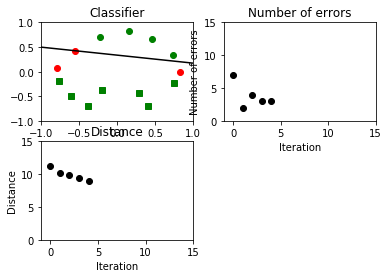

[[-0.45631966]
 [-2.81645689]
 [ 0.94855295]]
[-0.79142857  0.07973422  1.        ]
[-0.55714286  0.41196013  1.        ]
[-0.22571429  0.69767442  1.        ]
[ 0.16285714  0.83056478  1.        ]
[ 0.46        0.65780731  1.        ]
[ 0.73428571  0.33887043  1.        ]
[ 0.82571429 -0.01328904  1.        ]
Number of errors in iteration 5 : 2
Weights: [[-0.5020339485154013], [-3.3081512392269916], [0.9485529482883965]]


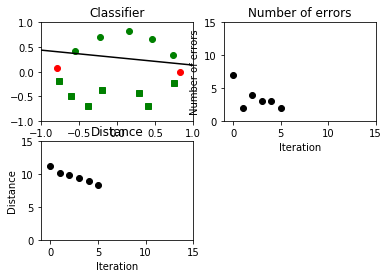

[[-0.50203395]
 [-3.30815124]
 [ 0.94855295]]
[-0.79142857  0.07973422  1.        ]
[-0.55714286  0.41196013  1.        ]
[-0.22571429  0.69767442  1.        ]
[ 0.16285714  0.83056478  1.        ]
[ 0.46        0.65780731  1.        ]
[ 0.73428571  0.33887043  1.        ]
[ 0.82571429 -0.01328904  1.        ]
Number of errors in iteration 6 : 1
Weights: [[0.2151089086274559], [-3.6071545614861287], [-0.051447051711603464]]


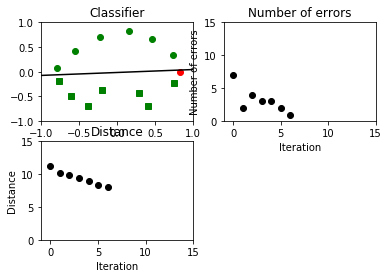

[[ 0.21510891]
 [-3.60715456]
 [-0.05144705]]
[-0.79142857  0.07973422  1.        ]
[-0.55714286  0.41196013  1.        ]
[-0.22571429  0.69767442  1.        ]
[ 0.16285714  0.83056478  1.        ]
[ 0.46        0.65780731  1.        ]
[ 0.73428571  0.33887043  1.        ]
[ 0.82571429 -0.01328904  1.        ]
Number of errors in iteration 7 : 1
Weights: [[0.14082319434174162], [-3.8264236644761622], [-0.051447051711603464]]


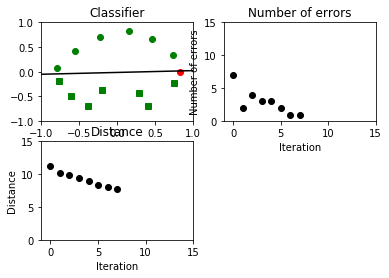

[[ 0.14082319]
 [-3.82642366]
 [-0.05144705]]
[-0.79142857  0.07973422  1.        ]
[-0.55714286  0.41196013  1.        ]
[-0.22571429  0.69767442  1.        ]
[ 0.16285714  0.83056478  1.        ]
[ 0.46        0.65780731  1.        ]
[ 0.73428571  0.33887043  1.        ]
[ 0.82571429 -0.01328904  1.        ]
Number of errors in iteration 8 : 1
Weights: [[0.06653748005602733], [-4.045692767466195], [-0.051447051711603464]]


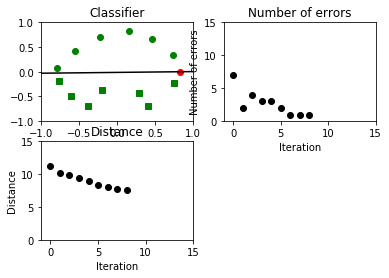

[[ 0.06653748]
 [-4.04569277]
 [-0.05144705]]
[-0.79142857  0.07973422  1.        ]
[-0.55714286  0.41196013  1.        ]
[-0.22571429  0.69767442  1.        ]
[ 0.16285714  0.83056478  1.        ]
[ 0.46        0.65780731  1.        ]
[ 0.73428571  0.33887043  1.        ]
[ 0.82571429 -0.01328904  1.        ]
Number of errors in iteration 9 : 0
Weights: [[-0.007748234229686957], [-4.264961870456228], [-0.051447051711603464]]


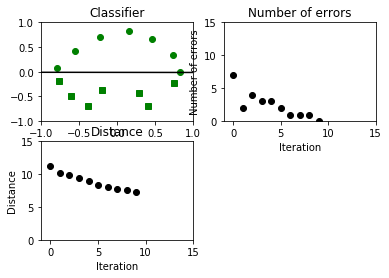

In [52]:
learn_perceptron_from_data("Datasets/dataset3.mat")